<a href="https://colab.research.google.com/github/ApahSaroj/WQC/blob/main/Water_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [5]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [7]:
df.drop('WPI', inplace=True, axis=1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,Good


In [8]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     2
WQC           0
dtype: int64

In [9]:
pho = df['Phosphate']
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [10]:
import numpy as np

for i in range(len(pho)):
    if i>5:
        if np.isnan(pho[i]):
                pho[i] = np.mean([pho[i-1], pho[i-2], pho[i-3], pho[i-4], pho[i-5]])
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [11]:
for i in range(4,-1,-1):
    if np.isnan(pho[i]):
            pho[i] = np.mean([pho[i+1], pho[i+2], pho[i+3], pho[i+4], pho[i+5]])
pho

0      0.06211
1      0.00960
2      0.01280
3      0.01536
4      0.01000
        ...   
482    0.01500
483    0.03300
484    0.16300
485    0.21900
486    0.07000
Name: Phosphate, Length: 487, dtype: float64

In [12]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WQC           0
dtype: int64

In [13]:
df.shape

(487, 15)

In [14]:
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,Good


In [15]:
df.drop('WQC', inplace=True, axis=1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900


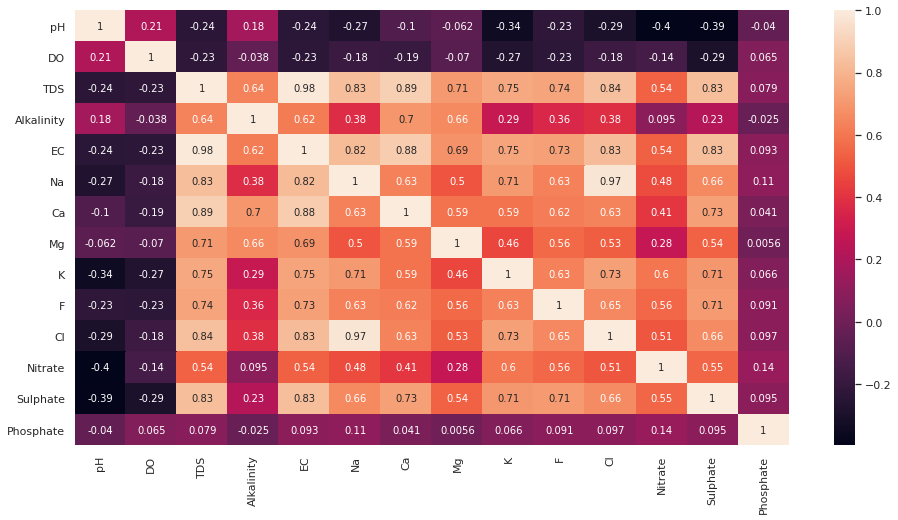

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[4856551.801718533,
 1490810.5074084832,
 853123.1668025409,
 602304.4969113758,
 458468.94722196757,
 398841.8517824958,
 356828.3532820306,
 331831.7996513274,
 304821.92669863475,
 284633.37424670317]

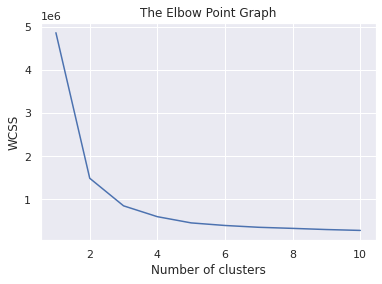

In [19]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within-Cluster Sum of Square
plt.show()

In [20]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(df)
print(y)

[0 3 0 0 0 0 3 0 3 3 3 0 0 0 2 3 3 3 3 3 3 3 3 3 3 0 0 3 0 3 0 0 0 0 0 0 0
 3 0 0 0 0 2 0 0 0 3 3 0 3 3 0 0 0 0 1 2 2 2 1 0 0 3 3 3 1 1 3 1 1 1 1 1 3
 3 3 1 3 1 1 1 2 2 2 3 3 3 3 3 0 0 0 0 0 0 0 0 0 3 0 2 2 1 1 1 1 1 1 1 2 3
 3 0 0 0 1 3 3 1 3 1 3 3 3 1 3 3 3 1 3 1 1 1 2 1 1 3 3 3 3 3 1 1 1 3 3 3 3
 3 1 1 1 1 1 3 3 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 0 3 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 3 0
 0 0 0 0 0 3 3 3 3 0 0 3 0 0 0 3 3 0 0 0 0 0 0 3 3 3 3 0 0 3 3 0 0 0 3 0 0
 0 0 0 0 3 0 3 3 3 3 3 3 0 3 3 3 3 0 3 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 3 0 0 0 1 3 1 3
 3 0 0 1 0 0 3 0 3 3 3 1 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 0 3 3
 3 3 3 3 1 1 3 1 3 3 0 0 3 0 0 0 0 0 0 0 3 2 2 2 2 2 2 2 2 2 0 3 0 0 0 0 3
 0 3 3 3 3 3 0 0 3 0 0 0 3 0 3 0 0 0 0 3 0 0 0 3 3 3 3 3 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2]


In [21]:
df['Cluster'] = y

In [22]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,Cluster
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,3
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0


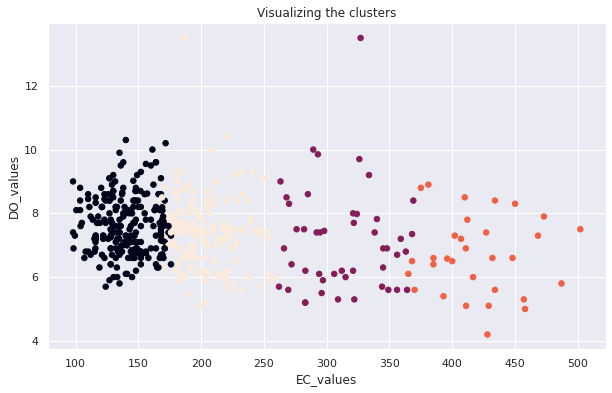

In [23]:
plt.figure(figsize = (10, 6))
plt.scatter(df['EC'], df['DO'], c = y, s = 30)
plt.xlabel('EC_values')
plt.ylabel('DO_values')
plt.title('Visualizing the clusters')
plt.show()

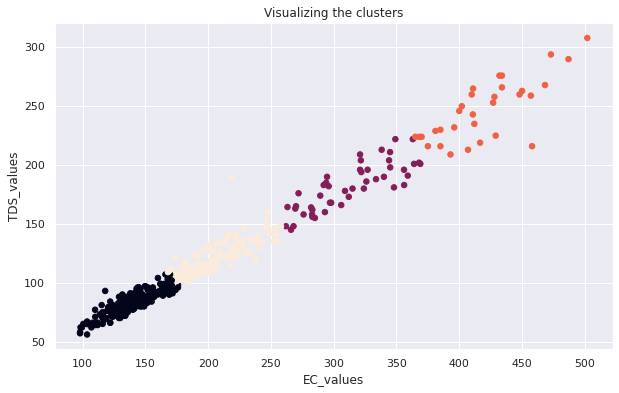

In [24]:
plt.figure(figsize = (10, 6))
plt.scatter(df['EC'], df['TDS'], c = y, s = 30)
plt.xlabel('EC_values')
plt.ylabel('TDS_values')
plt.title('Visualizing the clusters')
plt.show()

In [25]:
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle

In [26]:
X = df.drop(['Cluster'], axis=1).values
y = df['Cluster'].values

In [27]:
X_test = X
y_test = y

In [28]:
n_classes = 4

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm = SVC(kernel='rbf')
y_score_1 = cross_val_score(svm, X, y, cv=5)
svm_score = y_score_1.mean()
print(svm_score)

0.9835472333263201


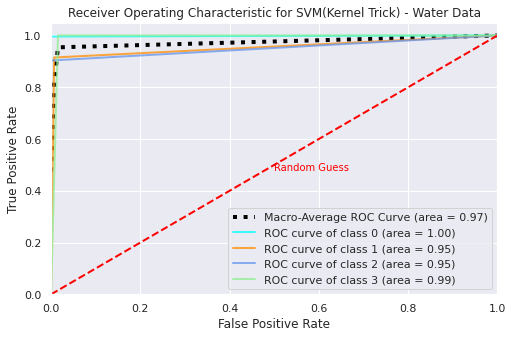

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(svm, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"], alpha = 1.0,
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM(Kernel Trick) - Water Data')
plt.legend(loc="lower right")
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
y_score_2 = cross_val_score(lreg, X, y, cv=5)
lreg_score = y_score_2.mean()
print(lreg_score)

0.8212497370082052


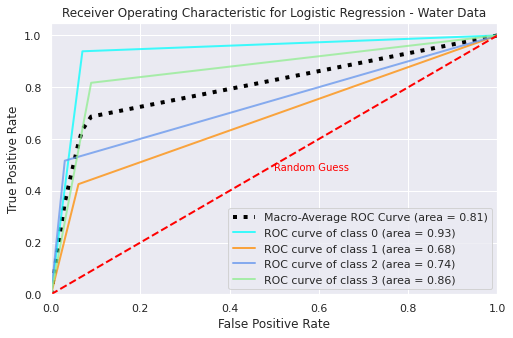

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(lreg, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression - Water Data')
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_score_3 = cross_val_score(gnb, X, y, cv=5)
gnb_score = y_score_3.mean()
print(gnb_score)

0.9159899011150852


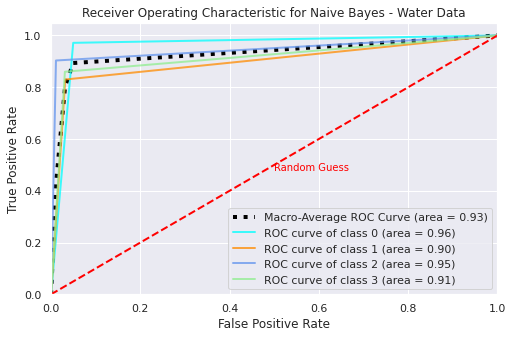

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(gnb, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes - Water Data')
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
y_score_4 = cross_val_score(dtc, X, y, cv=5)
dtc_score = y_score_4.mean()
print(dtc_score)

0.9774247843467284


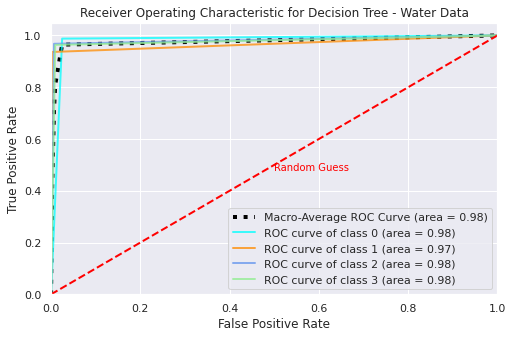

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(dtc, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree - Water Data')
plt.legend(loc="lower right")
plt.show()

In [37]:
classifiers = ['SVM_Kernel', 'Logistic_Regression', 'Naive_Bayes', 'Decision_Tree']
accuracies = [svm_score*100, lreg_score*100, gnb_score*100, dtc_score*100]
comparision = pd.DataFrame({'Classifier':classifiers,'Accuracy':accuracies}, index = [i for i in range(1,5)])
comparision

,Classifier,Accuracy
1,SVM_Kernel,98.354723
2,Logistic_Regression,82.124974
3,Naive_Bayes,91.598990
4,Decision_Tree,97.742478


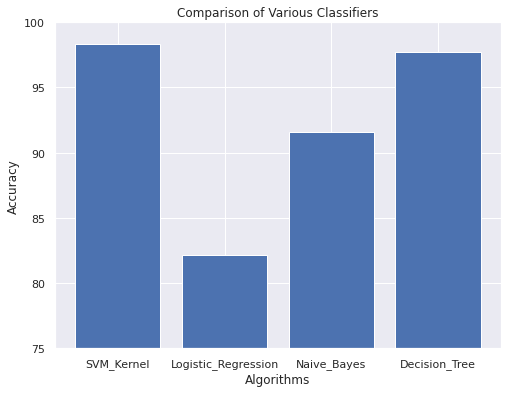

In [38]:
plt.figure(4, [8,6])
plt.bar(range(len(classifiers)), accuracies, align = 'center')
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Comparison of Various Classifiers')
plt.ylim([75, 100])
plt.show()

In [39]:
Cluster_1 = df[df['Cluster'] == 0]
Cluster_2 = df[df['Cluster'] == 1]
Cluster_3 = df[df['Cluster'] == 2]
Cluster_4 = df[df['Cluster'] == 3]

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture
%matplotlib inline

In [41]:
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,Cluster
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,3
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,2
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,2
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,2
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,2


In [43]:
print(Cluster_1.shape)
print(Cluster_2.shape)
print(Cluster_3.shape)
print(Cluster_4.shape)

(245, 15)
(47, 15)
(31, 15)
(164, 15)
